https://www.machinelearningplus.com/python/101-pandas-exercises-python/

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. how to import pandas and check the version?

In [3]:
import pandas as pd
pd.__version__

'0.23.4'

# 2. how to create a series form a list, numpy array and dict?

In [4]:
import numpy as np
mylist = list("abcedfghijklmnopqrstuvwxyz")
myarr = np.arange(26)
mydict = dict(zip(mylist, myarr))

In [5]:
pd.Series(mylist).head()

0    a
1    b
2    c
3    e
4    d
dtype: object

In [6]:
pd.Series(myarr).head()

0    0
1    1
2    2
3    3
4    4
dtype: int64

In [7]:
pd.Series(mydict).head()

a    0
b    1
c    2
e    3
d    4
dtype: int64

# 3 how to convert the index of series into a column of a dataframe?

In [8]:
mylist = list("abcedfghijklmnopqrstuvwxyz")
myarr = np.arange(26)
mydict = dict(zip(mylist, myarr))
ser = pd.Series(mydict)

In [9]:
ser.to_frame().reset_index().head()

,index,0
0,a,0
1,b,1
2,c,2
3,e,3
4,d,4


# How to comine many series to form a dataframe?
Combine ser1 and ser2 to form a dataframe.

In [10]:
import numpy as np
ser1 = pd.Series(list('abcedfghijklmnopqrstuvwxyz'))
ser2 = pd.Series(np.arange(26))

In [11]:
df1 = pd.DataFrame({"ser1" : ser1, "ser2": ser2})
# alt
df2 = pd.concat([ser1, ser2], axis = 1)

In [12]:
df1.head()

,ser1,ser2
0,a,0
1,b,1
2,c,2
3,e,3
4,d,4


In [13]:
df2.head()

,0,1
0,a,0
1,b,1
2,c,2
3,e,3
4,d,4


# 5 how to assign name to series' index?
give a name to the series ser calling it "alphabets"

In [14]:
ser = pd.Series(list('abcedfghijklmnopqrstuvwxyz'))

In [15]:
ser.rename("alphabets")
# alt
ser.name = "alphabets"

In [16]:
ser.head()

0    a
1    b
2    c
3    e
4    d
Name: alphabets, dtype: object

# 6. how to get the items of series A not present in Series B?
from ser1 remove items present in ser2

In [17]:
ser1 = pd.Series([1, 2, 3, 4, 5])
ser2 = pd.Series([4, 5, 6, 7, 8])

In [18]:
ser1[~(ser1.isin(ser2))]

0    1
1    2
2    3
dtype: int64

# 7 how to get the items not common to both series A and series B?
get all items of ser1 and ser2 not common to both

In [19]:
ser1 = pd.Series([1, 2, 3, 4, 5])
ser2 = pd.Series([4, 5, 6, 7, 8])

In [20]:
ser_u = pd.Series(np.setxor1d(ser1,ser2))
ser_u

0    1
1    2
2    3
3    6
4    7
5    8
dtype: int64

# 8 how to get the minimum, 25th percentile, median, 75th and max of a numeric series?
Compute the minimum, 25th percentile, median, 75th, and maximum of ser.

In [21]:
state = np.random.RandomState(100)
ser = pd.Series(np.random.normal(10, 5, 25))

In [22]:
np.percentile(ser, q=[0, 25, 50, 75, 100])

array([ 3.00512256,  7.03704626, 10.53787635, 14.44404713, 24.78544133])

# 9 how to get frequency counts of unique items of a series?
calculate the freqency counts of each unique value ser.

In [23]:
ser = pd.Series(np.take(list('abcdefgh'), np.random.randint(8, size=30)))

In [24]:
ser.value_counts()

d    6
c    5
g    5
f    4
a    4
b    3
e    2
h    1
dtype: int64

# 10 how to keep only top 2 most frequent values as it is and replace everything else as "Other"?
from ser, keep the top 2 most ferquent items as it is and replace everything else as "Other".

In [25]:
np.random.RandomState(100)
ser = pd.Series(np.random.randint(1, 5, [12]))

In [26]:
vals = ser.value_counts()
print("top 2 freq:\n", vals)

top 2 freq:
 4    5
3    3
1    3
2    1
dtype: int64


In [27]:
ser[~ser.isin(vals.index[:2])] = "Others"
ser

0          3
1          4
2          4
3          3
4     Others
5          4
6     Others
7     Others
8          3
9          4
10         4
11    Others
dtype: object

# 11 how to bin a numeric series to 10 groups of equal size?
Bin the series ser into 10 equal deciles and replace the value with the bin name

In [28]:
np.random.RandomState(100)
ser = pd.Series(np.random.random(20))

In [29]:
binned = pd.qcut(ser,q=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],
                        labels=['1st', '2nd', '3rd', '4th', '5th',
                                '6th', '7th', '8th', '9th', '10th'])
binned.head()


0     9th
1    10th
2     8th
3     4th
4     7th
dtype: category
Categories (10, object): [1st < 2nd < 3rd < 4th ... 7th < 8th < 9th < 10th]

# 12 how to convert a numpy array to a dataframe of given shape?
reshape the series ser into a dataframe of 7 rows and 5 columns

In [30]:
ser = pd.Series(np.random.randint(1, 10, 35))

In [31]:
df = pd.DataFrame(ser.values.reshape(7,5))
print("shape:", df.shape)
df.head()

shape: (7, 5)


,0,1,2,3,4
0,9,3,3,9,5
1,7,4,8,4,3
2,9,5,1,5,6
3,4,2,9,6,6
4,7,3,2,3,1


# 13 how to find the position of numbers that are multiples of 3 from a series?
find the position of numbesr that are multiples of 3 from ser.

In [32]:
ser = pd.Series(np.random.randint(1, 10, 7))

In [33]:
ser

0    5
1    3
2    1
3    5
4    9
5    5
6    8
dtype: int64

In [34]:
np.argwhere(ser % 3 == 0)

array([[1],
       [4]])

# 14 how to extract items at given positions from a series
from ser, extract the items at positions in list pos.

In [35]:
ser = pd.Series(list('abcdefghijklmnopqrstuvwxyz'))
pos = [0, 4, 8, 14, 20]

In [36]:
ser[pos]
# alt
ser.take(pos)

0     a
4     e
8     i
14    o
20    u
dtype: object

# 15 how to stack two series vertically and horizontally?
stack ser1 and ser2 vertically and horizontally [to form a dataframe].

In [37]:
ser1 = pd.Series(range(5))
ser2 = pd.Series(list('abcde'))

In [38]:
# vertical
ser1.append(ser2)

# horizontal
pd.concat([ser1,ser2],axis=1)

,0,1
0,0,a
1,1,b
2,2,c
3,3,d
4,4,e


# 16 how to get the positions of items of a series A in another series B?
get the positions of items of ser2 in ser1 as a list.

In [39]:
ser1 = pd.Series([10, 9, 6, 5, 3, 1, 12, 8, 13])
ser2 = pd.Series([1, 3, 10, 13])

In [40]:
[np.where(i == ser1)[0].tolist()[0] for i in ser2]

[5, 4, 0, 8]

In [41]:
[pd.Index(ser1).get_loc(i) for i in ser2]

[5, 4, 0, 8]

# 17 how to compute the mean squared error on a truth and predicted series?
compute the mean squared error of truth and pred series.

In [42]:
truth = pd.Series(range(10))
pred = pd.Series(range(10)) + np.random.random(10)

In [43]:
((truth - pred)**2).mean()

0.34387840555010163

# 18 how to convert the first character of each element in a series to uppercase?
change the first character of each word to upper case in each word of ser.

In [44]:
ser = pd.Series(['how', 'to', 'kick', 'ass?'])

In [45]:
ser_upper = ser.apply(lambda x: x.capitalize())

In [46]:
ser_upper

0     How
1      To
2    Kick
3    Ass?
dtype: object

# 19 how to calclate the number of characters in each word in a series?

In [47]:
ser = pd.Series(['how', 'to', 'kick', 'ass?'])

In [48]:
ser.apply(lambda x: len(x))

0    3
1    2
2    4
3    4
dtype: int64

# 20 how to compute difference of differences between consequtive numbers of a series
difference of differences between the consequtive numbers of ser.

In [49]:
ser = pd.Series([1, 3, 6, 10, 15, 21, 27, 35])

In [50]:
print(ser.diff(1).tolist())
print(ser.diff(1).diff(1).tolist())

[nan, 2.0, 3.0, 4.0, 5.0, 6.0, 6.0, 8.0]
[nan, nan, 1.0, 1.0, 1.0, 1.0, 0.0, 2.0]


# 21 how to convert a series of date-strings to a timeseries?

In [51]:
ser = pd.Series(['01 Jan 2010', '02-02-2011', '20120303', '2013/04/04', '2014-05-05', '2015-06-06T12:20'])

In [52]:
pd.to_datetime(ser)

0   2010-01-01 00:00:00
1   2011-02-02 00:00:00
2   2012-03-03 00:00:00
3   2013-04-04 00:00:00
4   2014-05-05 00:00:00
5   2015-06-06 12:20:00
dtype: datetime64[ns]

# 22 how to get the day of month, week number, day of year and day of week from a series of date strings?
Get the day of month, week number, day of year and day of week from ser.

In [53]:
ser = pd.Series(['01 Jan 2010', '02-02-2011', '20120303', '2013/04/04', '2014-05-05', '2015-06-06T12:20'])

In [54]:
ser_dt = pd.to_datetime(ser)
print("Date: ", ser_dt.dt.day.tolist())
print("Week number:", ser_dt.dt.week.tolist())
print("Day num of year:", ser_dt.dt.dayofyear.tolist())
print("Day of week:", ser_dt.dt.weekday_name.tolist())

Date:  [1, 2, 3, 4, 5, 6]
Week number: [53, 5, 9, 14, 19, 23]
Day num of year: [1, 33, 63, 94, 125, 157]
Day of week: ['Friday', 'Wednesday', 'Saturday', 'Thursday', 'Monday', 'Saturday']


# 23 how to convert year-month string to dates corresponding to the 4th day of the month?
Change ser to dates that start with 4th of the respective months.

In [55]:
ser = pd.Series(['Jan 2010', 'Feb 2011', 'Mar 2012'])

In [56]:
ser_wd = ser.apply(lambda x: x + " 04")

In [57]:
pd.to_datetime(ser_wd)

0   2010-01-04
1   2011-02-04
2   2012-03-04
dtype: datetime64[ns]

# 24 how to filter words that contain atleast 2 vovwels from a series?
From ser, extract words that cotain atleast 2 vowels.

In [58]:
ser = pd.Series(['Apple', 'Orange', 'Plan', 'Python', 'Money'])

In [59]:
def vowelCounter(word):
    vowels = ["a", "e", "i", "o", "u"]
    cc = 0
    for v in vowels:
        cc += word.lower().count(v)
    return(cc)

In [60]:
ser[ser.apply(lambda x: True if vowelCounter(x) >= 2 else False)]

0     Apple
1    Orange
4     Money
dtype: object

# 25 How to filter valid emails from a series?
Extract the valid emails from the series emails. The regex pattern for valid emails is provoded as refernce.

In [61]:
emails = pd.Series(['buying books at amazom.com', 'rameses@egypt.com', 'matt@t.co', 'narendra@modi.com'])
pattern ='[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\\.[A-Za-z]{2,4}'

In [62]:
# import regex module
email_pat = emails.str.findall(pattern)
# remove all removed cases
email_pat[email_pat.apply(lambda x: True if len(x) > 0 else False)].tolist()

[['rameses@egypt.com'], ['matt@t.co'], ['narendra@modi.com']]

# 26 how to get the mean of a series grouped by another series?
Compute the mean of weights of each fruit.

In [63]:
fruits = pd.Series(np.random.choice(['apple', 'banana', 'carrot'], 10))
weights = pd.Series(np.linspace(1, 10, 10))

In [64]:
weights.groupby(fruits).mean()

apple     2.5
banana    7.0
carrot    1.0
dtype: float64

# 27 how to compute the euiclidian distance between two series?
Compute the euclidean distance between series (points) p and q, without using a packaged formula.

In [65]:
p = pd.Series([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
q = pd.Series([10, 9, 8, 7, 6, 5, 4, 3, 2, 1])

In [66]:
np.sum((p-q)**2)**0.5

18.16590212458495

# 28 how to find all the local maxima (or peaks) in a numeric series?
Get the positions of peaks [values surrounded by smaller values on both sides] in ser.

In [67]:
ser = pd.Series([2, 10, 3, 4, 9, 10, 2, 7, 3])

In [68]:
ser_peaks = ser[(ser.shift(1) < ser) & (ser > ser.shift(-1))]

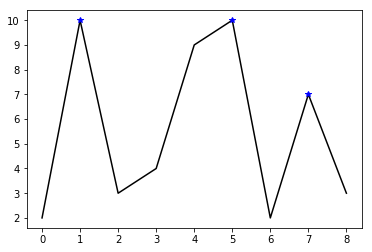

In [69]:
plt.plot(range(len(ser)),ser,'k-')
plt.plot(ser_peaks,'b*')

# 29 How to replace missing spaces in a string with the least frequent character?
Replace the spaces in my_str with the least frequent character.

In [70]:
my_str = 'dbc deb abed gade'

In [71]:
ser = pd.Series(list(my_str))

In [72]:
freq = ser.value_counts()
print(freq)

d    4
e    3
b    3
     3
a    2
c    1
g    1
dtype: int64


In [73]:
least_freq = freq.dropna().index[-1]

In [74]:
"".join(ser.replace(" ", least_freq))

'dbcgdebgabedggade'

# 30 how to create a TimeSeries starting "2000-01-01" and 10 weekends (saturdays) after that having random numbers as values?

In [75]:
dates = pd.date_range("2000-01-01",periods=10, freq="W-SAT")
vals = np.random.randint(0,10,size=10)

ser = pd.Series(vals, dates)
ser

2000-01-01    8
2000-01-08    3
2000-01-15    2
2000-01-22    3
2000-01-29    4
2000-02-05    0
2000-02-12    6
2000-02-19    9
2000-02-26    7
2000-03-04    2
Freq: W-SAT, dtype: int64

# 31 How to fill an intermittent time series so all missing dates show up with values of previous non-missing date?
ser has missing dates and values. Make all missing dates appear and fill up with values from previous dates. 

In [76]:
ser = pd.Series([1,10,3,np.nan], index=pd.to_datetime(['2000-01-01', '2000-01-03', '2000-01-06', '2000-01-08']))
print(ser)

2000-01-01     1.0
2000-01-03    10.0
2000-01-06     3.0
2000-01-08     NaN
dtype: float64


In [77]:
ser.resample("D").ffill()

2000-01-01     1.0
2000-01-02     1.0
2000-01-03    10.0
2000-01-04    10.0
2000-01-05    10.0
2000-01-06     3.0
2000-01-07     3.0
2000-01-08     NaN
Freq: D, dtype: float64

# 32 how to compute the autocorrelations of a numeric series?
Compute autocorrelations for the first 10 lags of ser. Find out which lag has the largest correlation.

In [78]:
np.random.RandomState(100)
ser = pd.Series(np.arange(20) + np.random.normal(1, 10, 20))

In [79]:
ac = [ser.autocorr(i).round(2) for i in range(11)]

In [80]:
print(ac[1:])

[0.52, 0.27, 0.19, -0.09, 0.21, 0.27, 0.45, 0.59, 0.43, 0.07]


In [81]:
print("max ac lag: ", np.argmax(np.abs(ac[1:]))+1)

max ac lag:  8


# 33 how to import only every nth row from a csv file to create a dataframe?
import every 50th row from BostonHousing dataset as a dataframe.

In [82]:
df = pd.read_csv("boston.csv", chunksize=50)
df2 = pd.DataFrame()
for chunk in df:
    df2 = df2.append(chunk.iloc[0,:])

In [83]:
df2.head()

,age,b,chas,crim,dis,indus,lstat,medv,nox,ptratio,rad,rm,tax,zn
0,65.2,396.90,0.0,0.00632,4.0900,2.31,4.98,24.0,0.538,15.3,1.0,6.575,296.0,18.0
50,45.7,395.56,0.0,0.08873,6.8147,5.64,13.45,19.7,0.439,16.8,4.0,5.963,243.0,21.0
100,79.9,394.76,0.0,0.14866,2.7778,8.56,9.42,27.5,0.520,20.9,5.0,6.727,384.0,0.0
150,97.3,372.80,0.0,1.65660,1.6180,19.58,14.10,21.5,0.871,14.7,5.0,6.122,403.0,0.0
200,13.9,384.30,0.0,0.01778,7.6534,1.47,4.45,32.9,0.403,17.0,3.0,7.135,402.0,95.0


# 34 how to change column values when importing csv to a dataframe?
Import the boston ..., but while importing change the "medv" column so that values < 25 become "Low" and > 25 becomes "High".

In [84]:
df = pd.read_csv("boston.csv", 
                 converters={"medv": lambda x: "High" if float(x) > 25 else "Low"})

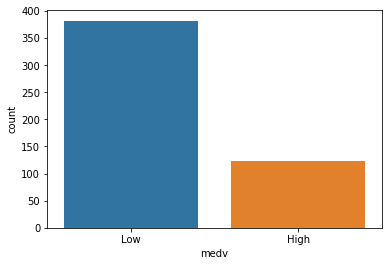

In [88]:
sns.countplot(data=df, x = "medv")

# 35 How to create a dataframe with rows as strides from a given series?

In [89]:
L = pd.Series(range(15))

In [98]:
def gen_strides(a, stride_len=5, window_len=5):
    n_strides = ((a.size - window_len)//stride_len) + 1
    return np.array([a[s:(s+window_len)] for s in np.arange(0, a.size, stride_len)[:n_strides]])

gen_strides(L, stride_len=2, window_len=4)

array([[ 0,  1,  2,  3],
       [ 2,  3,  4,  5],
       [ 4,  5,  6,  7],
       [ 6,  7,  8,  9],
       [ 8,  9, 10, 11],
       [10, 11, 12, 13]])

# 36 How to import only specified columns from a csv file?
Import "crim" and "medv" columns of the Boston dataset as a dataframe.

In [101]:
df = pd.read_csv("boston.csv", usecols=["crim", "medv"])

In [102]:
df.head()

,crim,medv
0,0.00632,24.0
1,0.02731,21.6
2,0.02729,34.7
3,0.03237,33.4
4,0.06905,36.2


# 37 How to get the nrows, ncolumns, dataype, summary stats of each column of a dataframe? Also get the array and list equivalent.
Get the number of rows, columns, datatype and summary statistics of each column of the Cars93 dataset. Also get the numpy array and list equivalent of the dataframe.

In [118]:
df = pd.read_csv("cars93.csv")
# shapes
print("\n shape\n")
print(df.shape)

# dtypes
print("\n dtype\n")
print(df.dtypes)

# how many cols under each dtype
print("\n counts\n")
print(df.get_dtype_counts())

# summary
df.describe()

# as array
df_arr = df.values

# list
df_list = df.values.tolist()



 shape

(93, 27)

 dtype

Manufacturer           object
Model                  object
Type                   object
Min.Price             float64
Price                 float64
Max.Price             float64
MPG.city              float64
MPG.highway           float64
AirBags                object
DriveTrain             object
Cylinders              object
EngineSize            float64
Horsepower            float64
RPM                   float64
Rev.per.mile          float64
Man.trans.avail        object
Fuel.tank.capacity    float64
Passengers            float64
Length                float64
Wheelbase             float64
Width                 float64
Turn.circle           float64
Rear.seat.room        float64
Luggage.room          float64
Weight                float64
Origin                 object
Make                   object
dtype: object

 counts

float64    18
object      9
dtype: int64


# 38 How to extract the row and column number of a particular  cell with given criterion?
Which manufacturer, model and type has the highest Price? What is the row and column number of the cell with the highest Price value?

In [121]:
df = pd.read_csv("cars93.csv")

In [126]:
df.columns

Index(['Manufacturer', 'Model', 'Type', 'Min.Price', 'Price', 'Max.Price',
       'MPG.city', 'MPG.highway', 'AirBags', 'DriveTrain', 'Cylinders',
       'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile', 'Man.trans.avail',
       'Fuel.tank.capacity', 'Passengers', 'Length', 'Wheelbase', 'Width',
       'Turn.circle', 'Rear.seat.room', 'Luggage.room', 'Weight', 'Origin',
       'Make'],
      dtype='object')

In [142]:
df_max = df.loc[df.Price == df.Price.max(),["Manufacturer", "Model", "Type"]]
print(df_max)
row = df_max.index[0]
print("row: ", row)
print("Price: ", df.at[row,"Price"])

     Manufacturer Model     Type
58  Mercedes-Benz  300E  Midsize
row:  58
Price:  61.9


# 39 How to rename a specific columns in a dataframe?
Rename the column Type as CarType in df and replace the "." column names with "_".

In [158]:
df = pd.read_csv("cars93.csv")

In [159]:
df = df.rename(index=str, columns={"Type": "CarType"})
df.columns = df.columns.map(lambda x: x.replace(".","_"))

In [160]:
print(df.columns)

Index(['Manufacturer', 'Model', 'CarType', 'Min_Price', 'Price', 'Max_Price',
       'MPG_city', 'MPG_highway', 'AirBags', 'DriveTrain', 'Cylinders',
       'EngineSize', 'Horsepower', 'RPM', 'Rev_per_mile', 'Man_trans_avail',
       'Fuel_tank_capacity', 'Passengers', 'Length', 'Wheelbase', 'Width',
       'Turn_circle', 'Rear_seat_room', 'Luggage_room', 'Weight', 'Origin',
       'Make'],
      dtype='object')


# 40 How to check if a dataframe has any missing values?
Check if df has any missing values.

In [161]:
df = pd.read_csv("cars93.csv")

In [176]:
df.isnull().values.any()

True